---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Support Vector Machines

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Graphic illustration of Support Vectors

### Generating data

In the following code, we generated 100 samples of a synthetic dataset using the **sklearn.datasets.make_classification** function.

This dataset has 2 classes (**n_classes=2**) and 2 features (**n_features=2**). It means that $y \in \{0,1\}$ and $X \in \mathbb{R}^2$

The parameter **class_sep** controls the separability of the class, and in this example, we set this to return a dataset that is linearly separable:

In [2]:
# create a colormap for the points
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

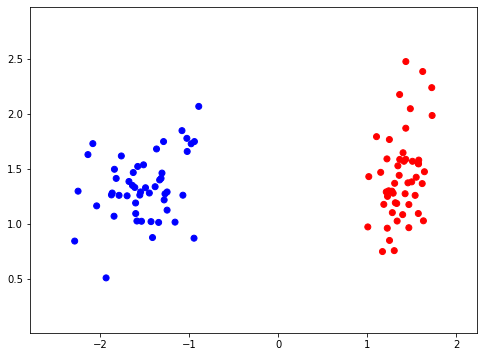

In [3]:
from sklearn import datasets

X, y = datasets.make_classification(n_samples=100, n_classes=2,
                                    n_features=2, n_redundant=0, n_informative=2,
                                    random_state=1, n_clusters_per_class=1, class_sep=1.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

figure(figsize=(8, 6))
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

# set the graph limits
ylim(y_min, y_max)
xlim(x_min, x_max);

This function will plot the decision boundary and the support vectors of a model:

In [4]:
def plot_boundary(model, X):
    # create a mesh of points that cover the full graph area
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # use the classifier to predict the class of each mesh point
    Z = clf.decision_function(X_grid)
    Z = Z.reshape(xx.shape)

    figure(figsize=(8, 6))

    # plot the decision boundary
    norm = plt.cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
    contourf(xx, yy, Z, 12, cmap=plt.cm.RdBu, alpha=.8, norm=norm)
    # plt.colorbar()

    # plot the decision hyper-planes
    contour(xx, yy, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'],
            levels=[-1., 0, 1.])

    # plot the dataset points
    scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    # plot the support vectors
    SV = clf.support_vectors_
    scatter(SV[:, 0], SV[:, 1], c=y[clf.support_],
            cmap=cm_bright, s=500, marker='x')

    # set the graph limits
    ylim(y_min, y_max)
    xlim(x_min, x_max);

## Example 1: Linear kernel with high penalty ($C \rightarrow \infty$)

The parameter **C** controls the penalty of the error terms for a soft-margin SVM classifier.

Setting **C** to a high value means that the classifier will try to maximize the margin with a high penalty for misclassified points.

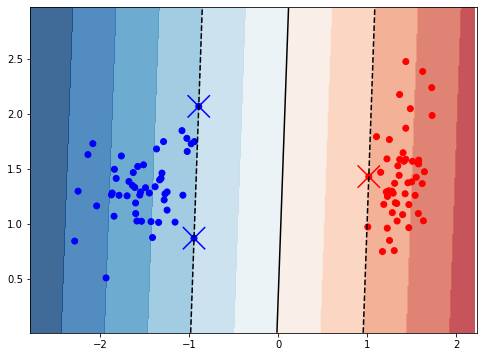

In [5]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1e12)
clf.fit(X, y)

plot_boundary(clf, X)

## Example 2: Linear kernel with low penalty ($C \rightarrow 0$)

Setting **C** to a low value means that the classifier will try to maximize the margin with a small penalty for misclassified points.

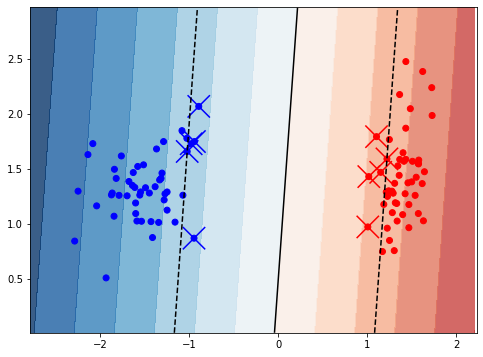

In [6]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1e-1)
clf.fit(X, y)

plot_boundary(clf, X)

## Example 3: RBF kernel with high penalty ($C \rightarrow \infty$) and small $\gamma$:

The Radial Basis Function kernel is given by the function $\exp(-\gamma \left|x-x'\right|^2)$.

When training an SVM with the RBF kernel, two parameters must be considered: $C$ and $\gamma$. The parameter $C$, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low $C$ makes the decision surface smooth, while a high $C$ aims at classifying all training examples correctly. $\gamma$ defines how much influence a single training example has. The larger $\gamma$ is, the closer other examples must be to be affected.

Setting **C** to a high value means that the classifier will try to maximize the margin with a high penalty for misclassified points, and will try to classify all training examples correctly.

The parameter **gamma** is the coefficient of the RBF function. Setting **gamma** to a small value means that just a few training examples will have influence in the model.

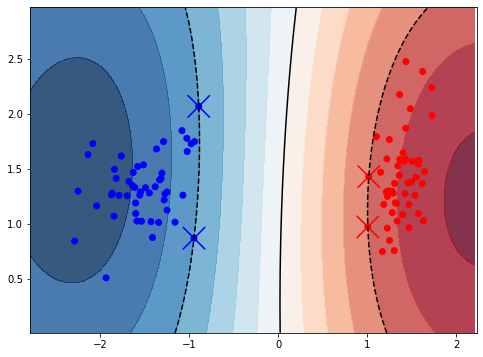

In [7]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=1e-1, C=1e12)
clf.fit(X, y)

plot_boundary(clf, X)

## Exercise 1: RBF kernel with high penalty ($C \rightarrow \infty$) and high $\gamma$ (e.g., $\gamma = 20$)

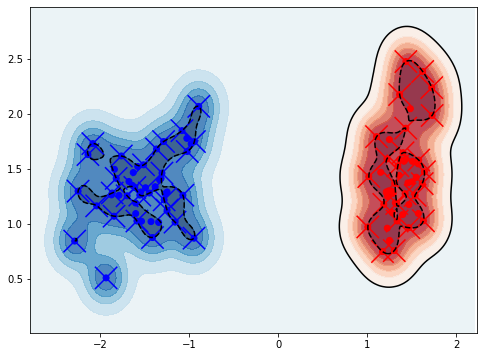

In [8]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=20, C=1e12)
clf.fit(X, y)

plot_boundary(clf, X)

## Exercise 2: Check the behavior of the SVM classifiers in the case when the dataset is not linearly separable.

First, create a new dataset that is not linearly separable:

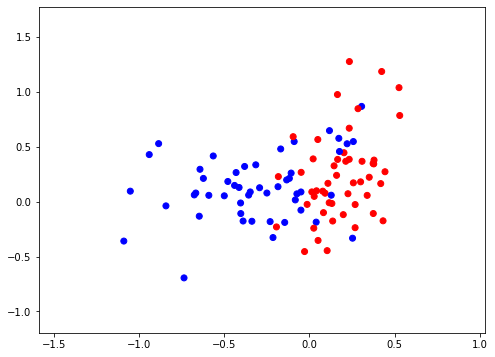

In [9]:
from sklearn import datasets

X, y = datasets.make_classification(n_samples=100, n_classes=2,
                                    n_features=2, n_redundant=0, n_informative=2,
                                    random_state=1, n_clusters_per_class=1, class_sep=0.2)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

figure(figsize=(8, 6))
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

# set the graph limits
ylim(y_min, y_max)
xlim(x_min, x_max);

Next, check the behavior of the SVM classifiers with:

Linear kernel with high penalty ($C \rightarrow \infty$)

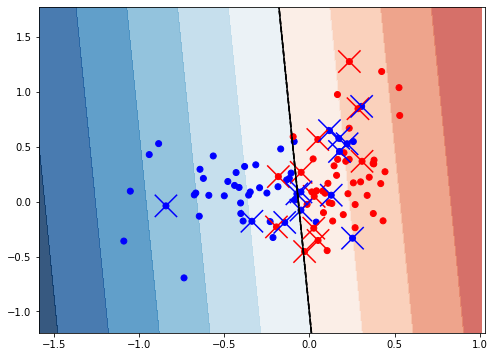

In [10]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1e12)
clf.fit(X, y)

plot_boundary(clf, X)

Linear kernel with low penalty ($C \rightarrow 0$)

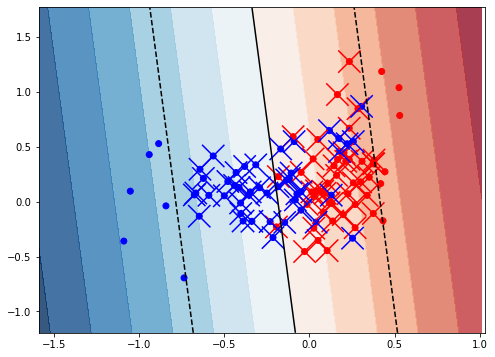

In [11]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1e-1)
clf.fit(X, y)

plot_boundary(clf, X)

RBF kernel with high penalty ($C \rightarrow \infty$) and small $\gamma$ (e.g., $\gamma = 0.1$):

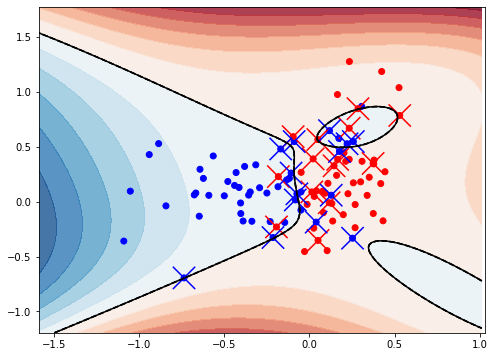

In [12]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=1e-1, C=1e12)
clf.fit(X, y)

plot_boundary(clf, X)

RBF kernel with high penalty ($C \rightarrow \infty$) and high $\gamma$ (e.g., $\gamma = 20$)

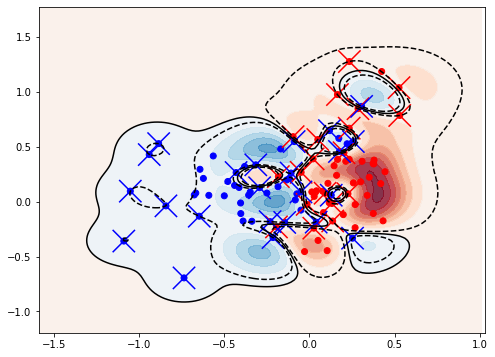

In [13]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=20, C=1e12)
clf.fit(X, y)

plot_boundary(clf, X)

---

# 2. Classify digits with SVM

## Load the Digits dataset

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

Load the features in a variable with name $\mathbf{X}$ and the target in a variable with name $\mathbf{y}$.

**Attention**: This dataset is composed of 1797 images of $8 \times 8$ pixels. You have to transform it in a matrix of 1797 samples and 64 features ($1797 \times 64$).

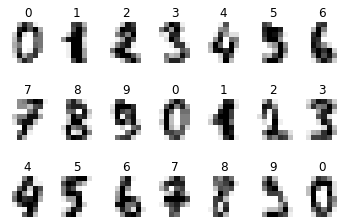

In [14]:
from sklearn import datasets

digits = datasets.load_digits()

# plot the first 21 samples
for index, (image, label) in enumerate(zip(digits.images[:21], digits.target[:21])):
    plt.subplot(3, 7, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [15]:
X = digits.images.reshape(digits.images.shape[0], -1)
y = digits.target

## Create a SVM Classifier

In this exercise, we have to classify the dataset in 10 different classes. We can use any classifier that is able to classify in 2 different classes to classify in n different classes. There are 2 main strategies for this:

- One-versus-one: http://scikit-learn.org/stable/modules/multiclass.html#one-vs-one
- One-versus-rest: http://scikit-learn.org/stable/modules/multiclass.html#one-vs-the-rest

The implementation of SVM classifier (SVC) in scikit-learn uses one-vs-one strategy:

http://scikit-learn.org/stable/modules/svm.html#multi-class-classification

Next, create a SVM classifier with **rbf** kernel and default parameters.
Then, create a list named **`gammas`** with values for the rbf coefficient (gamma) starting from $10^{-5}$ to $10^{-0.5}$, spaced evenly on a log scale. For each value of gamma, set the model parameter **`gamma`** to this value, calculate the 10-fold cross-validation scores, and add the average score to a list with name **`scores`**.

In [16]:
from sklearn import svm, model_selection

classifier = svm.SVC(kernel='rbf')

gammas = np.logspace(-5, -0.5, 20)
cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

scores = []

for gamma in gammas:
    classifier.gamma = gamma
    scores_gamma = model_selection.cross_val_score(classifier, X, y, 
                                                    cv=cv)
    scores.append(np.average(scores_gamma))

Finally, plot the scores for each gamma, and print the best gamma and the associated score.

Best gamma: 0.0013538761800225433
Best score: 0.9922098075729361


Text(0, 0.5, 'Score (accuracy)')

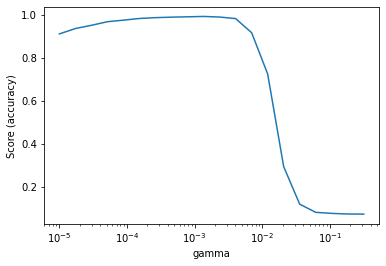

In [17]:
print('Best gamma:', gammas[np.argmax(scores)])
print('Best score:', scores[np.argmax(scores)])

semilogx(gammas, scores)
plt.xlabel('gamma')
plt.ylabel('Score (accuracy)')

## Exercise: 
Find both **gamma** and **C** that minimizes the error (or maximizes the score) using 10-fold cross-validation.

In [18]:
from sklearn import svm, model_selection

classifier = svm.SVC(kernel='rbf')

gammas = np.logspace(-5, -0.5, 20)
Cs = np.logspace(-1, 1, 3)
cv = model_selection.KFold(n_splits=10, shuffle=True,
                            random_state=0)

gs = model_selection.GridSearchCV(classifier,
                              param_grid={"gamma": gammas,
                                          "C": Cs},
                              cv=cv,  n_jobs=7)
gs.fit(X, y)

print('Best parameters:', gs.best_params_)
print('Best score:', gs.best_score_)

Best parameters: {'C': 10.0, 'gamma': 0.00026366508987303583}
Best score: 0.9922129112352577


In [19]:
%load_ext watermark

%watermark -nmvu --iv

numpy            1.19.1
matplotlib       3.4.2
re               2.2.1
matplotlib.pylab 1.19.1
logging          0.5.1.2
last updated: Mon Dec 06 2021 

CPython 3.8.11
IPython 7.26.0

compiler   : Clang 10.0.0 
system     : Darwin
release    : 21.1.0
machine    : x86_64
processor  : i386
CPU cores  : 16
interpreter: 64bit
